<a href="https://colab.research.google.com/github/stephintoto/ICT-ASSIGNMENTS/blob/main/casestudml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECESSARY LIBRARIES**

Following libraries are used to perform various tasks:
pandas for data manipulation, numpy for numerical operations, train_test_split for splitting data, LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, and SVC for machine learning models, accuracy_score, confusion_matrix, classification_report, roc_curve, auc, and f1_score for evaluation metrics, LabelEncoder, OrdinalEncoder, StandardScaler, and MinMaxScaler for data preprocessing, GridSearchCV for hyperparameter tuning, matplotlib and seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

We load the datasets for training and testing into pandas DataFrames.

In [2]:
df_train = pd.read_csv('/content/Training_data.csv')
df_test = pd.read_csv('/content/Testing_data.csv')

pd.read_csv(): This function from the pandas library reads the data from a CSV file and returns it as a DataFrame, which is a table-like structure ideal for data manipulation.

df_train: This variable stores the training data, which will be used to train the machine learning model.

df_test: This variable stores the test data, which will be used for model evaluation and prediction.

In [3]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [4]:
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


info() method provides summary of the training dataset, including the column names, non-null values count, data types, and memory usage.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


replacing Empty Strings: In the 'TotalCharges' column, some values might be empty strings (" ") representing missing data. These are replaced with NaN to handle missing values correctly in later steps.

Converting to Float: After replacing the empty strings, the column is converted to the float data type to ensure that it can be used in numeric operations, such as training machine learning models or calculating statistics.

In [6]:
df_train['TotalCharges'] = df_train['TotalCharges'].replace(" ", float('nan')).astype(float)
df_test['TotalCharges'] = df_test['TotalCharges'].replace(" ", float('nan')).astype(float)


 we check for any missing values (NaN) in the training dataset after the cleaning process.

In [7]:
df_train.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


gender and OnlineSecurity: Since both have a significant number of missing values,imputation techniques can be used.

MonthlyCharges and TotalCharges: These numerical columns also have missing values. Consider imputing these with statistical measures (mean, median).

In [8]:
df_train['gender'].fillna(df_train['gender'].mode()[0], inplace=True)
df_train['OnlineSecurity'].fillna(df_train['OnlineSecurity'].mode()[0], inplace=True)
df_train['TotalCharges'].fillna(df_train['TotalCharges'].mode()[0], inplace=True)
df_train['MonthlyCharges'].fillna(df_train['MonthlyCharges'].median(), inplace=True)

 Ensures that the dataset has no missing values in these columns, which is crucial for training machine learning models

 fillna(): This method replaces missing values in the specified column with a specified value, which in this case is the mode of the column.

mode()[0]: mode() returns the most frequent value(s) in the column. [0] accesses the first mode value in case there are multiple modes.

inplace=True: This parameter modifies the DataFrame in place without creating a copy, so the changes are applied directly to df_train.

In [9]:
df_train.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df_test.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
df_test['TotalCharges'].fillna(df_test['TotalCharges'].mode()[0], inplace=True)


In [12]:
df_train.drop(columns=['customerID'], inplace=True)

In [13]:
unique_value_columns = [col for col in df_train.columns if df_train[col].nunique() == 1]
df_train.drop(columns=unique_value_columns, inplace=True)

In [14]:
correlation_matrix = df_train[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].corr()


In [15]:
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.022672,0.205024,0.097848
tenure,0.022672,1.000000,0.232216,0.777719
MonthlyCharges,0.205024,0.232216,1.000000,0.590765
TotalCharges,0.097848,0.777719,0.590765,1.000000


In [16]:
high_correlation_threshold = 0.9


highly_correlated_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                           if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > high_correlation_threshold]


In [17]:
for col1, col2 in highly_correlated_pairs:
    if col2 in df_train.columns:
        df_train.drop(columns=[col2], inplace=True)

Drop customerID.

Identify columns with only one unique value and drop them.

Check correlations between numerical columns and drop one column from each highly correlated pair.

In [18]:
df_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

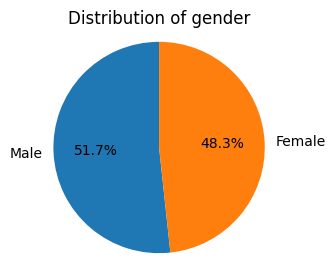

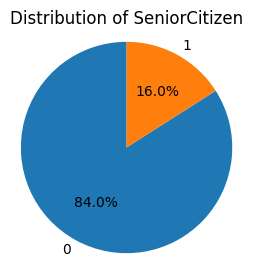

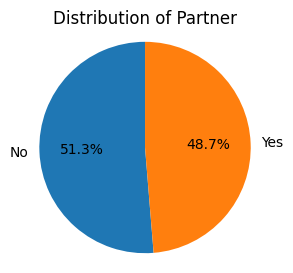

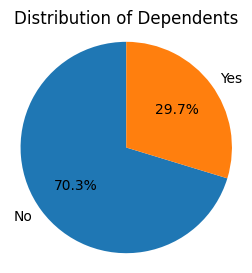

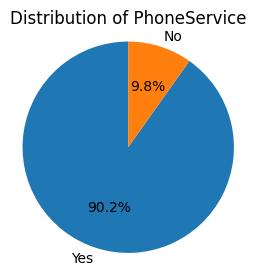

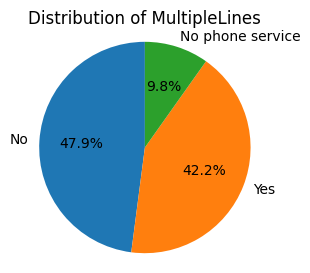

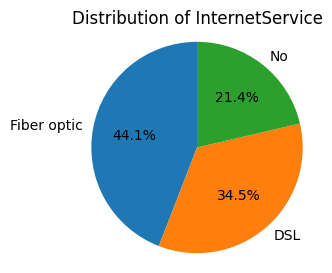

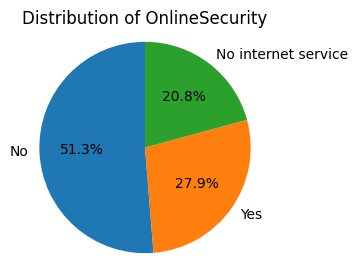

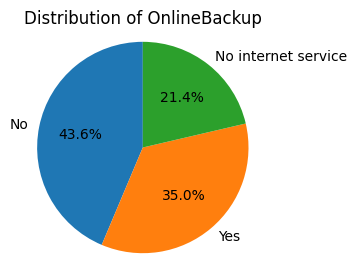

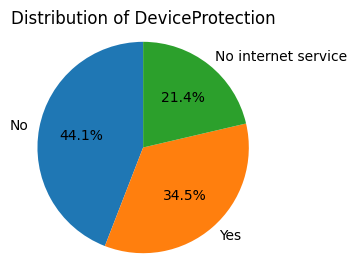

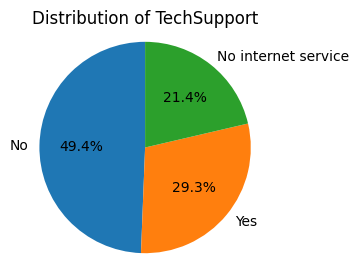

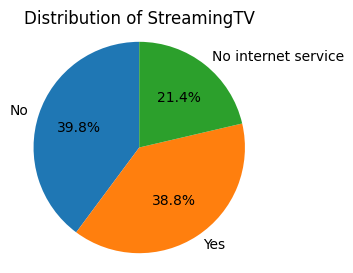

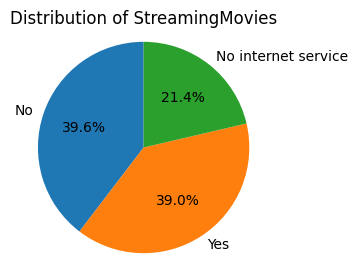

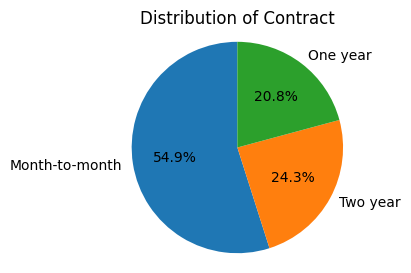

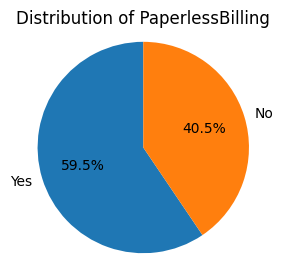

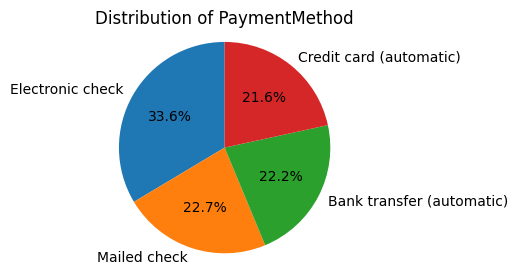

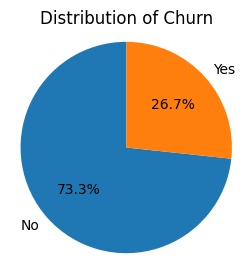

In [19]:
columns_plot = [col for col in df_train.columns if col not in ['MonthlyCharges', 'TotalCharges', 'tenure']]

for col in columns_plot:
  value_counts = df_train[col].value_counts()
  plt.figure(figsize=(3, 3))
  plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribution of {col}')
  plt.axis('equal')
  plt.show()


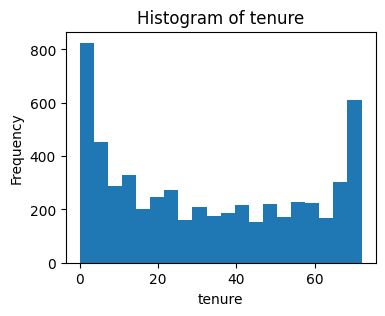

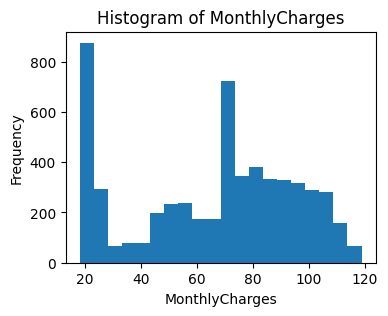

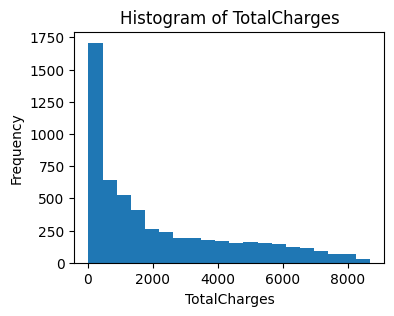

In [20]:
num_cols = df_train.select_dtypes(include=np.number).columns
num_cols = [col for col in num_cols if col != 'SeniorCitizen']
for col in num_cols:
  plt.figure(figsize=(4, 3))
  plt.hist(df_train[col], bins=20)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()

In [21]:
# Calculate the total charge per month
df_train['ChargePerMonth'] = df_train['TotalCharges'] / df_train['tenure']
df_test['ChargePerMonth'] = df_test['TotalCharges'] / df_test['tenure']

# Create a new feature for the interaction between tenure and monthly charges
df_train['TenureMonthlyCharges'] = df_train['tenure'] * df_train['MonthlyCharges']
df_test['TenureMonthlyCharges'] = df_test['tenure'] * df_test['MonthlyCharges']

# Create a new feature for the ratio of total charges to monthly charges
df_train['TotalMonthlyChargeRatio'] = df_train['TotalCharges'] / df_train['MonthlyCharges']
df_test['TotalMonthlyChargeRatio'] = df_test['TotalCharges'] / df_test['MonthlyCharges']

# Create a new feature for the difference between total charges and monthly charges
df_train['TotalMonthlyChargeDiff'] = df_train['TotalCharges'] - df_train['MonthlyCharges']
df_test['TotalMonthlyChargeDiff'] = df_test['TotalCharges'] - df_test['MonthlyCharges']

We create a new feature, ChargePerMonth, which represents the average charge per month for each customer by dividing the TotalCharges by the tenure.

 TenureMonthlyCharges, which represents the product of the tenure and MonthlyCharges to capture how these two factors interact with each other.

 TotalMonthlyChargeRatio, which represents the ratio of TotalCharges to MonthlyCharges.

 TotalMonthlyChargeDiff, which represents the difference between TotalCharges and MonthlyCharges.

In [22]:
# Select numerical columns excluding 'SeniorCitizen'
numerical_cols = df_train.select_dtypes(include=np.number).columns
numerical_cols = [col for col in numerical_cols if col != 'SeniorCitizen']

# Initialize StandardScaler
scaler = StandardScaler()

# Replace infinite values with NaN
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of each column
df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].mean())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].mean())

# Fit and transform the numerical columns
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

only numerical columns (those that are of type np.number) are selected for scaling. The column 'SeniorCitizen' is excluded, assuming it is a binary indicator and does not need scaling.

Filled missing values (NaN) in numerical columns with the mean of each respective column. This ensures there are no missing values, maintaining data integrity for model training.

Used StandardScaler to standardize all numerical columns, giving them a mean of 0 and a standard deviation of 1. This step is critical for models sensitive to the scale of input data, such as logistic regression or SVM.
The training dataset was scaled using fit_transform (learning the scaling parameters), and the testing dataset was scaled using transform (applying the learned parameters).

In [23]:

categorical_cols = df_train.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
for col in categorical_cols:
  if col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])
  else:
    df_train[col] = ordinal_encoder.fit_transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = ordinal_encoder.transform(df_test[col].values.reshape(-1, 1))


For specific binary categorical columns (gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn), we applied LabelEncoder to convert them into numerical values.

For other categorical columns, we used OrdinalEncoder to transform them into numerical values, capturing any ordinal relationship.

In [24]:
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargePerMonth,TenureMonthlyCharges,TotalMonthlyChargeRatio,TotalMonthlyChargeDiff
0,0,0,0,0,0.097232,1,0.0,2.0,1.0,1.0,...,1.0,0,3.0,-1.541793,-0.648112,0,-1.288288,-0.702329,0.117032,-0.633106
1,0,0,0,0,-0.187173,0,1.0,0.0,0.0,0.0,...,0.0,1,3.0,-1.024876,-0.532820,0,-0.845744,-0.579814,-0.152519,-0.523618
2,1,0,0,0,0.950447,1,2.0,1.0,0.0,2.0,...,0.0,0,2.0,1.141008,1.508207,0,1.172683,1.435992,1.014174,1.504896
3,1,0,1,0,0.259749,1,0.0,2.0,1.0,1.0,...,2.0,1,0.0,-1.552131,-0.608547,0,-1.280763,-0.670535,0.308434,-0.593108
4,0,0,1,1,0.422266,0,1.0,0.0,0.0,2.0,...,1.0,1,0.0,-0.490728,-0.006973,0,-0.360602,-0.043489,0.440048,-0.000687


In [25]:
X_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']
X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']


Splitting Features (X_train, X_test) and Target (y_train, y_test):
The Churn column is separated as the target variable (y_train and y_test).
All other columns are kept as features (X_train and X_test) for model training and testing.

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

The model was trained on the training dataset (X_train, y_train) using the fit() method, which allows the model to learn from the data.

In [27]:
print(df_test.columns)
print(df_train.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'ChargePerMonth', 'TenureMonthlyCharges', 'TotalMonthlyChargeRatio',
       'TotalMonthlyChargeDiff'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'ChargePerMonth',
       'TenureMonthlyCharges', 'TotalMonthlyChargeRatio',
       'TotalMonthlyChargeDiff'],
      dtype='object')


In [28]:
# Drop any unwanted columns and ensure consistency
X_train = df_train.drop(['Churn', 'customerID'], axis=1, errors='ignore')
X_test = df_test.drop(['Churn', 'customerID'], axis=1, errors='ignore')

# Recheck and correct column names
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()

# Ensure the same preprocessing is applied to both datasets
# For example, scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and predict again
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1044
           1       0.66      0.56      0.60       365

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [34]:
X_train

array([[-1.0346798 , -0.43602072, -0.97441314, ..., -0.70232921,
         0.11703237, -0.63310606],
       [-1.0346798 , -0.43602072, -0.97441314, ..., -0.57981388,
        -0.15251937, -0.52361845],
       [ 0.96648258, -0.43602072, -0.97441314, ...,  1.43599243,
         1.01417366,  1.50489589],
       ...,
       [ 0.96648258, -0.43602072,  1.02625874, ..., -0.38566221,
         1.39528772, -0.35568108],
       [-1.0346798 , -0.43602072, -0.97441314, ...,  1.51066101,
         1.43728676,  1.50062234],
       [ 0.96648258,  2.29346899,  1.02625874, ..., -0.40274078,
        -0.35470515, -0.34884784]])

In [35]:
y_train


,Churn
0,0
1,0
2,0
3,0
4,0
...,...
5629,0
5630,0
5631,0
5632,0


In [36]:
#use gridsearch for hyperparameter tuning
#define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] #REGULARISATION STRENGTGH
              ,'penalty': ['l1', 'l2'] #type of regularisation
              ,'solver': ['liblinear', 'saga'] #SOLVER
              }
#create logistic regression object
logreg = LogisticRegression(max_iter=1000)
#perform gridsearch
grid_search = GridSearchCV(logreg, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
#print best parameters
print("Best parameters: ", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [37]:
best_logreg_mod = LogisticRegression(C=0.1,penalty='l2', solver='saga')
best_logreg_mod.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='saga')

customizes the logistic regression model to potentially improve performance by adjusting regularization strength and using a suitable solver for optimization.

In [38]:
best_y_pred = best_logreg_mod.predict(X_test)

In [39]:
print(classification_report(y_test, best_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1044
           1       0.66      0.55      0.60       365

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



**KNN**

In [40]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1044
           1       0.56      0.31      0.40       365

    accuracy                           0.76      1409
   macro avg       0.68      0.61      0.62      1409
weighted avg       0.73      0.76      0.73      1409



In [42]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'uniform'}


process helps to identify the best configuration for the KNN model, improving its performance by tuning hyperparameters.

In [43]:
best_knn = KNeighborsClassifier(n_neighbors=28, weights='uniform', metric='manhattan')
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=28)

In [44]:
knn_y_pred = best_knn.predict(X_test)

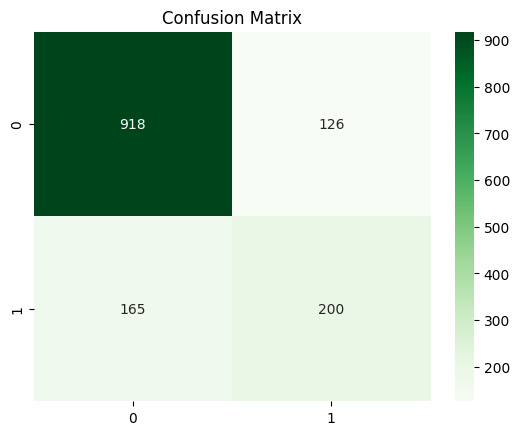

In [45]:
conf_mat = confusion_matrix(y_test,knn_y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

In [46]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1044
           1       0.61      0.55      0.58       365

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



**decision** **tree**

In [47]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
dt_pred = dt_model.predict(X_test)

In [49]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1044
           1       0.48      0.49      0.49       365

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [50]:
tree = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search.best_params_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


helps in identifying the optimal settings for the decision tree model, enhancing its performance by tuning key parameters.

In [51]:
dtbest_model = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=2,min_samples_split=2)
dtbest_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

In [52]:
dtbest_pred = dtbest_model.predict(X_test)

In [53]:
print(classification_report(y_test,dtbest_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1044
           1       0.54      0.57      0.55       365

    accuracy                           0.76      1409
   macro avg       0.69      0.70      0.70      1409
weighted avg       0.77      0.76      0.76      1409



**Random** **Forest**

In [54]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1044
           1       0.61      0.49      0.54       365

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

[[930 114]
 [187 178]]


**SVM**

In [56]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [57]:
svm_pred = svm_model.predict(X_test)

In [58]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1044
           1       0.68      0.48      0.57       365

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



we have prepared our data, trained various models, and optimized their performance to enhance prediction accuracy. Each model's hyperparameters were fine-tuned to ensure the best possible outcomes for predicting customer churn. The next steps involve evaluating these models on the test data and comparing their performance to choose the best model for deployment.